This section is just a playground for me to play with 1 polar plot.

In [1]:
from utils.polarplot import *
from utils.polardata import *

theta = np.radians([0,90, 180, 270, 0])
r = [1.0,0.3, 0.5, 1.0, 1.0]

theta2 = np.radians([0,90, 180, 270, 0])
r2 = [0.5,0.5, 0.3, 0.5, 0.5]

fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))

# Because default is 0 pointing to east, we want 0 at north.
axes.set_theta_zero_location('N')
# Default is ccw, we want cw
axes.set_theta_direction(-1)

# How often to show the 0 ... 1.0 gradation in r values.
axes.set_yticks([])
axes.set_xticks(np.radians([0,45,90,135,180,225,270,315]))
# If you want to turn on / off the gray scaling circles and r grids
axes.grid(False)

p = axes.plot(theta, r, color='black', ls='-', linewidth=3)
p2 = axes.plot(theta2, r2, color='gray', ls='-', linewidth=2)
#p[0].MarkerSize = 10
# So enclosed region is grey instead of blank / white.
#ax.fill(theta,r,'0.75')

This section is a working polar plot function, but just 1 polar data

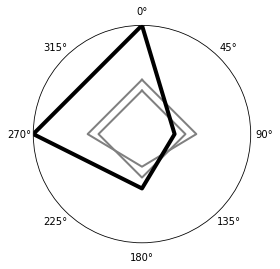

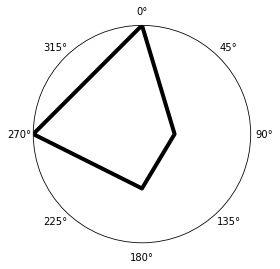

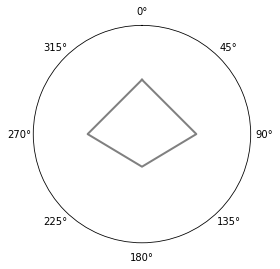

In [2]:
import matplotlib.pyplot as plt
import numpy as np 

# Inputs
theta = np.radians([0,90, 180, 270])
r = [1.0,0.3, 0.5, 1.0]

theta2 = np.radians([0,90, 180, 270])
r2 = [0.5,0.5, 0.3, 0.5]

theta3 = np.radians([0,90, 180, 270])
r3 = [0.4,0.4, 0.4, 0.4]
    
fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot(axes, theta2, r2, color='grey', linewidth=2)
polar_plot(axes, theta3, r3, color='grey', linewidth=2)
polar_plot(axes, theta, r, color='black', linewidth=4)

fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot(axes, theta, r, color='black', linewidth=4)
fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot(axes, theta2, r2, color='grey', linewidth=2)

We now make a function that make multiple polar plots in the same subplot

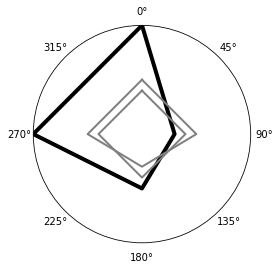

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot_population(axes, theta, r, [theta2, theta3], [r2, r3])

Brain area chart

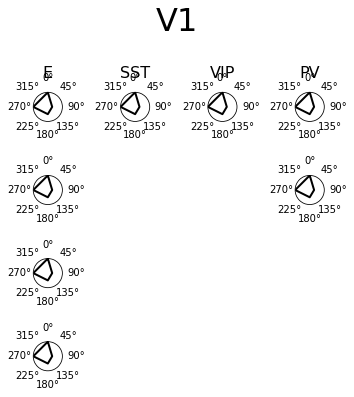

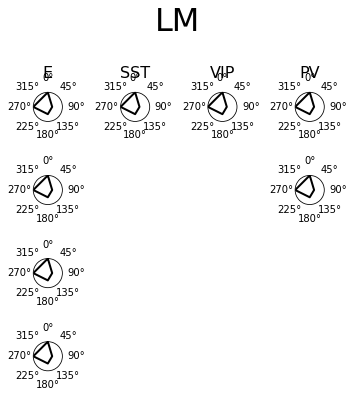

In [4]:
def plot_brain_area_chart(brain_area, layers, celltypes, polar_data):
    """
    - brain_area (string): e.g. 'V1'
    - layers (string[]): Order of layers, where each row = 1 layer. E.g. 'L2/3'
    - celltypes {string[]}: Order of columns, where each column = 1 celltype. E.g. 'SST'
    - polar_data ({(layer, celltype) -> (angle in degree, intensity)[]}}:
        E.g. {('L1', 'SST') -> [(90, 1.0), (270, 0.5)]}
    """
    fig, axes = plt.subplots(nrows=len(layers), ncols=len(celltypes), figsize=(5,5), subplot_kw=dict(polar=True))
    fig.suptitle(brain_area, fontsize=32, y = 1.1)
    
    for ax, celltype in zip(axes[0], celltypes):
        ax.set_title(celltype, fontsize=16, y = 1.3)

    for ax, layer in zip(axes[:,0], layers):
        ax.set_ylabel(layer, rotation=0, fontsize=16, labelpad = 50)
    
    for ax in axes.flatten():
        ax.axis('off')
    
    for (layer, celltype) in polar_data:
        # Get the axis given layer and celltype, then plot
        layer_id = layers.index(layer)
        celltype_id = celltypes.index(celltype)
        theta, r = zip(*polar_data[(layer, celltype)]) 
        theta = np.radians(theta)
        ax = axes[layer_id, celltype_id]
        ax.axis('on')
        polar_plot(ax, theta, r)
        
    fig.tight_layout()

mock_polar_data = [
    (0, 1.0),
    (90,0.3),
    (180,0.5),
    (270,1.0)
]
    
mock_data = {
    ('L2/3', 'E'): mock_polar_data,
    ('L2/3', 'SST'): mock_polar_data,
    ('L2/3', 'VIP'): mock_polar_data,
    ('L2/3', 'PV'): mock_polar_data,
    ('L4', 'E'): mock_polar_data,
    ('L4', 'PV'): mock_polar_data,
    ('L5', 'E'): mock_polar_data,
    ('L6', 'E'): mock_polar_data,
}

plot_brain_area_chart(
    brain_area = 'V1',
    layers = ['L2/3', 'L4', 'L5', 'L6'],
    celltypes = ['E', 'SST', 'VIP', 'PV'],
    polar_data = mock_data
)

plot_brain_area_chart(
    brain_area = 'LM',
    layers = ['L2/3', 'L4', 'L5', 'L6'],
    celltypes = ['E', 'SST', 'VIP', 'PV'],
    polar_data = mock_data
)
    

Filtered dataframe rows to polar_data

In [5]:
import pandas as pd
cell_dict = [
    {'angle': 180, 'magnitude': 0.0},
    {'angle': 180, 'magnitude': 1.0},
    {'angle': 180, 'magnitude': 0.5},
    {'angle': 90, 'magnitude': 1.0},
    {'angle': 90, 'magnitude': 0.0},
    {'angle': 90, 'magnitude': 3.0},
    {'angle': 90, 'magnitude': 5.0},
    {'angle': 270, 'magnitude': 1.0}
]

df = pd.DataFrame(cell_dict)
cell_df_to_median_polar(df)

[(90, 2.0), (180, 0.5), (270, 1.0)]

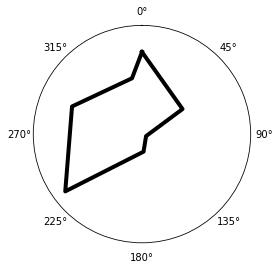

In [6]:
polardata = get_mock_polardata('vist',23,'df')
theta, r = zip(*polardata)
fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot(axes, theta, r, color='black', linewidth=4)